# Netflix EDA

#### Netflix is one of the most popular media and video streaming platforms. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Let's load the dataset by importing required libraries

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset

In [2]:
#read the dataset and check the first five rows
df= pd.read_excel(r"C:\Users\user\Downloads\asbl_data_analyst_interview_assignment_netflix.xlsx")

In [3]:
df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."


In [4]:
#Checking the shape of the dataframe
df.shape

(8807, 7)

### Data Handling and Cleaning

In [5]:
#Check the datatypes of all the columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          8807 non-null   object
 1   Title         8807 non-null   object
 2   Director      6173 non-null   object
 3   Cast          7982 non-null   object
 4   Country       7976 non-null   object
 5   Release_year  8807 non-null   int64 
 6   Genres        8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


#### Looks like there are so many missing values in some columns

In [6]:
#Checking the number of null values in the columns
df.isnull().sum()

Type               0
Title              0
Director        2634
Cast             825
Country          831
Release_year       0
Genres             0
dtype: int64

 There are significant number of missing values present in *Director* column and approximately 10% of missing value present in *Cast* and *Country* column. We will have to handle all null data points before we can dive into EDA and modeling.

In [7]:
df['Director'].fillna('No Director', inplace=True)
df['Cast'].fillna('No Cast', inplace=True)
df['Country'].fillna('No Country Given', inplace=True)

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable.

In [8]:
# Now let's again check for missing values if there's any
df.isnull().sum()

Type            0
Title           0
Director        0
Cast            0
Country         0
Release_year    0
Genres          0
dtype: int64

There are not any missing value present in the dataset. So, we will proceed further.

In [9]:
#Checking the datatypes of dataset
df.dtypes

Type            object
Title           object
Director        object
Cast            object
Country         object
Release_year     int64
Genres          object
dtype: object

#### Each column has the correct datatypes as they should have. We can move forward in our analysis.

### Splitting of Type column

Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [10]:
# For movies
movies_df = df[df['Type']=='Movie'].copy()
movies_df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2020,Documentaries
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Country Given,2021,Children & Family Movies
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies"
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas"
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,"Dramas, International Movies"


In [11]:
# For TV shows
TV_df = df[df['Type']=='TV Show'].copy()
TV_df.head()

,Type,Title,Director,Cast,Country,Release_year,Genres
1,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country Given,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country Given,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No Country Given,2021,"TV Dramas, TV Horror, TV Mysteries"


## Data analysis and Visualizations

#### Types: Movie or TV Show
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

In [12]:
# Lets count number of movies and TV shows in the list
show_type=df['Type'].value_counts()
show_type

Movie      6131
TV Show    2676
Name: Type, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


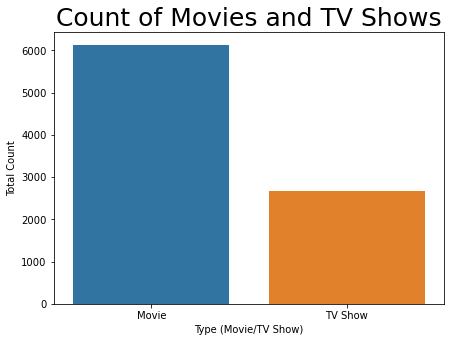

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(df.Type);
plt.title("Count of Movies and TV Shows", fontsize = 25)
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count" )
plt.show()

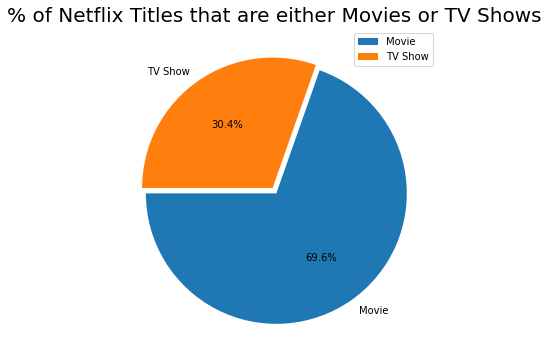

In [14]:
plt.figure(figsize=(8,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows", fontsize=20)
plt.pie(show_type, explode=(0.025,0.025),labels=df.Type.value_counts().index,autopct='%1.1f%%',  startangle=180)
plt.legend()
plt.show()

##### There are more movies then TV show listed in the Netflix.This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out as the majority. However, in terms of title, there are far more movie titles (69.6%) than TV show titles (30.4%).

### Movies/Tv shows added each year
Now we will take a look at the amount content Netflix has added throughout the previous years. 

In [15]:
year = df['Release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','Release_year':'count'})
year

,year,count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1925,1
71,1961,1
72,1947,1


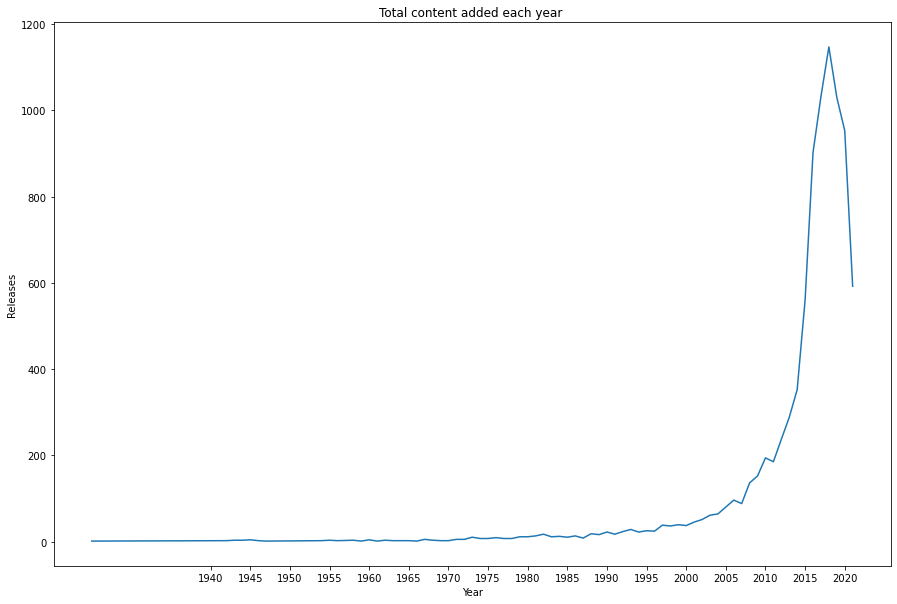

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=year, x='year', y='count')
ax.set_xticks(np.arange(1940, 2021, 5))
plt.title("Total content added each year ")
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

##### Based on the above timeline , we can see that the growth of movie/TV show relased has been growing tremendously after 2005.

### Countries with most number of movie
 
 Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we will plot a Top 20 list to see which countries have the highest availability of films on Netflix

In [17]:
df_countries =df.set_index('Title').Country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_countries = df_countries[df_countries != 'No Country Given']

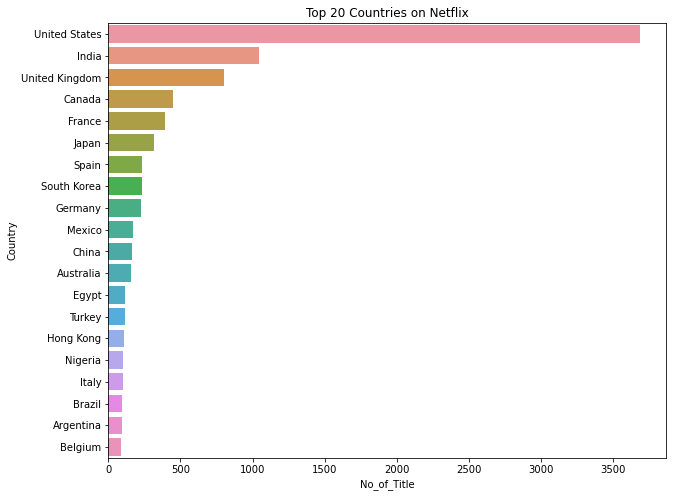

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(y = df_countries, order=df_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('No_of_Title')
plt.ylabel('Country')
plt.show()

The United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has been producing good number of contents.

### Genre with most number of contents

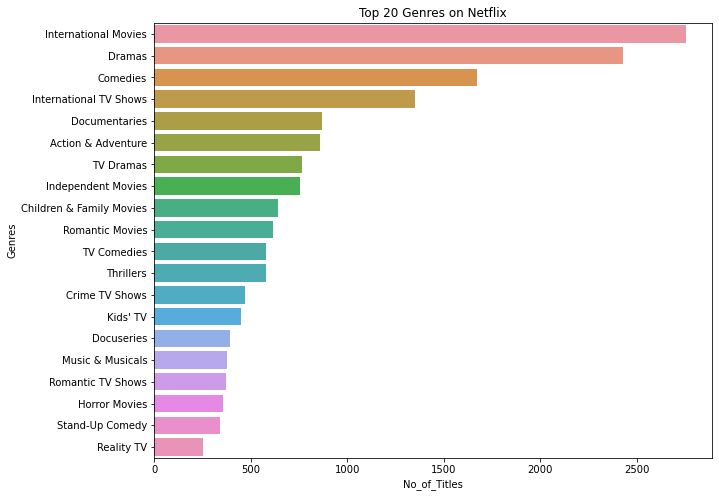

In [19]:
df_genres = df.set_index('Title').Genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,8))
sns.countplot(y = df_genres, order=df_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('No_of_Titles')
plt.ylabel('Genres')
plt.show()

International movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

## a).Which are the top 5 directors who produce most of the movies only?

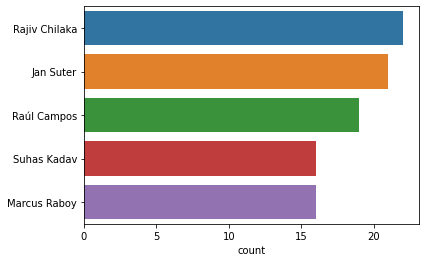

In [20]:
df_directors = df[df.Director != 'No Director'].set_index('Title').Director.str.split(', ', expand=True).stack().reset_index(drop=True)
sns.countplot(y = df_directors, order=df_directors.value_counts().index[:5])
plt.show()

## b).Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix (you can find a count for each genre and list the top 5 genres) for movies and TV shows?

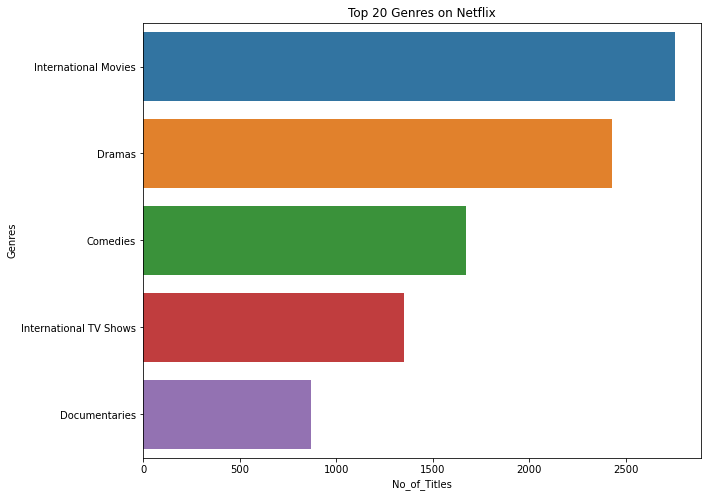

In [21]:
df_genres = df.set_index('Title').Genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,8))
sns.countplot(y = df_genres, order=df_genres.value_counts().index[:5])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('No_of_Titles')
plt.ylabel('Genres')
plt.show()

## d).Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform?

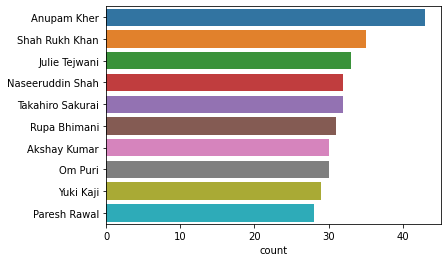

In [22]:
df_cast = df[df.Cast != 'No Cast'].set_index('Title').Cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = df_cast, order=df_cast.value_counts().index[:10])
plt.show()

## c). Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]

Ans. Based on the Bar chart on question "a", we clearly see top 5 most successful directors in therm of successful contents.So *Rajiv Chilaka* and *Jan Suter* are the 2 directors Netflix shall collaborate with.

## e).Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]


*Anupam Kher* and *Shahrukh Khan*

# Thank you !